# Keseluruhan Code

# Import Library

In [1]:
import pandas as pd
import numpy as np
#Import Library untuk Tokenisasi
import string 
import re #regex library
import matplotlib.pyplot as plt
import seaborn as sns

# import word_tokenize & FreqDist dari NLTK
from nltk.tokenize import word_tokenize 
from nltk.probability import FreqDist
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD


from sklearn.cluster import KMeans

# Read Data PTA

In [2]:
dataPTA = pd.read_csv('pta-manajemen.csv')

In [3]:
dataPTA.head(10)

,Judul,Penulis,Dosen 1,Dosen 2,Abstrak
0,ANALISIS TINGKAT RISIKO KREDIT \r\nPADA PD. BP...,Penulis : Iwan Kurniawan Gomes,Dosen Pembimbing I : Drs. Ec. Makhmud Zulkifli...,"Dosen Pembimbing II :Echsan Gani, S.E., M.SI",Hasil dari penelitian ini dari perhitungan Cre...
1,PENGARUH DIMENSI KUALITAS PELAYANAN TERHADAP K...,Penulis : Toni Budianto,"Dosen Pembimbing I : Bambang Setiyo Pambudi, S...","Dosen Pembimbing II :Fathor AS, S.E., MM.",ABSTRAK\r\n\r\nTujuan penelitian ini adalah un...
2,PENGARUH TIPE KEPEMIMPINAN TERHADAP PRESTASI K...,Penulis : Dharma Abidin Syah,Dosen Pembimbing I : Drs. Ec. Mudji Kuswinarno...,"Dosen Pembimbing II :Faidal SE, MM","ABSTRAK\r\n\tDharma Abidin Syah,Kesimpulan: (1..."
3,PENGARUH KOMPETENSI DOSEN TERHADAP KINERJA DOS...,Penulis : Aththaariq,"Dosen Pembimbing I : Dr.RM Moch Wispandono,.S....",Dosen Pembimbing II :Dr. Muhammad Alkirom Wild...,"Abstrak\r\n\r\nAththaariq, Pengaruh Kompetensi..."
4,Pengaruh Iklan di televisi terhadap keputusan ...,Penulis : Muhammad Sholeh,"Dosen Pembimbing I : Bambang Setiyo Pambudi, S...","Dosen Pembimbing II :Suyono, S.E.,M.S.M","Muhammad Sholeh, Pengaruh Iklan Di Televisi Te..."
5,PENGARUH PERILAKU KONSUMEN TERHADAP KEPUTUSAN ...,Penulis : Haryono Arifin,"Dosen Pembimbing I : Dr. Ir Nurita Andriani, MM","Dosen Pembimbing II :Nirma Kurriwati, S.P., M.Si","ABSTRAK\r\nHaryono Arifin, Pengaruh Perilaku K..."
6,PENGARUH SELF EFFICACY TERHADAP PRESTASI AKADE...,Penulis : ISTIB SYAROH,Dosen Pembimbing I : Dr. Dra. Hj. Iriani Ismai...,Dosen Pembimbing II :Drs. Ec. Mudji Kuswinarno...,Tujuan dari penelitian ini adalah untuk menget...
7,PENGARUH RELATIONSHIP MARKETING TERHADAP LOYAL...,Penulis : ARYA SUBAYU,"Dosen Pembimbing I : Dr.H.Pribanus Wantara.,Dr...","Dosen Pembimbing II :Hadi Purnomo, SE, MM",Tujuan penelitian ini adalah untuk mengetahui ...
8,ANALISIS FAKTOR-FAKTOR YANG MENENTUKAN PREFERE...,Penulis : ulfiyatun Mutohharoh,"Dosen Pembimbing I : Drs. Mohamad Tambrin, MM.","Dosen Pembimbing II :Yustina Chrismardani, S.S...","Ulfiyatun Mutohharoh, “Analisis Faktor-faktor ..."
9,ANALISA KUALITAS PELAYANAN JASA UNTUK MENGUKUR...,Penulis : Farid Ardyansyah,"Dosen Pembimbing I : Dr. H. Pribanus Wantara, ...","Dosen Pembimbing II :Hadi Purnomo, SE., MM",ABSTRAK\r\nTujuan penelitian ini adalah untuk ...


# Case Folding

In [4]:

# gunakan fungsi Series.str.lower() pada Pandas
dataPTA['Abstrak'] = dataPTA['Abstrak'].str.lower()

print('Case Folding Result : \n')

#cek hasil case fold
print(dataPTA['Abstrak'].head(5))
print('\n\n\n')

Case Folding Result : 

0    hasil dari penelitian ini dari perhitungan cre...
1    abstrak\r\n\r\ntujuan penelitian ini adalah un...
2    abstrak\r\n\tdharma abidin syah,kesimpulan: (1...
3    abstrak\r\n\r\naththaariq, pengaruh kompetensi...
4    muhammad sholeh, pengaruh iklan di televisi te...
Name: Abstrak, dtype: object






# Removal

In [5]:
#Import Library untuk Tokenisasi
import string 
import re #regex library

# import word_tokenize & FreqDist dari NLTK
from nltk.tokenize import word_tokenize 
from nltk.probability import FreqDist

def remove_PTA_special(text):
    # menghapus tab, new line, dan back slice
    text = text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")
    # menghapus non ASCII (emoticon, chinese word, .etc)
    text = text.encode('ascii', 'replace').decode('ascii')
    # menghapus mention, link, hashtag
    text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())
    # menghapus incomplete URL
    return text.replace("http://", " ").replace("https://", " ")
                
dataPTA['Abstrak'] = dataPTA['Abstrak'].apply(remove_PTA_special)

#menghapus nomor
def remove_number(text):
    return  re.sub(r"\d+", "", text)

dataPTA['Abstrak'] = dataPTA['Abstrak'].apply(remove_number)

#menghapus punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans("","",string.punctuation))

dataPTA['Abstrak'] = dataPTA['Abstrak'].apply(remove_punctuation)

#menghapus spasi leading & trailing
def remove_whitespace_LT(text):
    return text.strip()

dataPTA['Abstrak'] = dataPTA['Abstrak'].apply(remove_whitespace_LT)

#menghapus spasi tunggal dan ganda
def remove_whitespace_multiple(text):
    return re.sub('\s+',' ',text)

dataPTA['Abstrak'] = dataPTA['Abstrak'].apply(remove_whitespace_multiple)

# menghapus kata 1 abjad
def remove_singl_char(text):
    return re.sub(r"\b[a-zA-Z]\b", "", text)

dataPTA['Abstrak'] = dataPTA['Abstrak'].apply(remove_singl_char)

# Tokenisasi
def word_tokenize_wrapper(text):
    return word_tokenize(text)

dataPTA['abstrak_token'] = dataPTA['Abstrak'].apply(word_tokenize_wrapper)

print('Tokenizing Result : \n') 
print(dataPTA['abstrak_token'].head())

Tokenizing Result : 

0    [hasil, dari, penelitian, ini, dari, perhitung...
1    [abstrak, tujuan, penelitian, ini, adalah, unt...
2    [abstrak, dharma, abidin, syahkesimpulan, terd...
3    [abstrak, aththaariq, pengaruh, kompetensi, do...
4    [muhammad, sholeh, pengaruh, iklan, di, televi...
Name: abstrak_token, dtype: object


# STOPWORD 

In [6]:
from nltk.corpus import stopwords

list_stopwords = stopwords.words('indonesian')

# Mengubah List ke dictionary
list_stopwords = set(list_stopwords)


#remove stopword pada list token
def stopwords_removal(words):
    return [word for word in words if word not in list_stopwords]

#aStopwording
dataPTA['abstrak_stop'] = dataPTA['abstrak_token'].apply(stopwords_removal) 


print(dataPTA['abstrak_stop'].head(20))

0     [hasil, penelitian, perhitungan, credit, risk,...
1     [abstrak, tujuan, penelitian, mengidentifikasi...
2     [abstrak, dharma, abidin, syahkesimpulan, peng...
3     [abstrak, aththaariq, pengaruh, kompetensi, do...
4     [muhammad, sholeh, pengaruh, iklan, televisi, ...
5     [abstrak, haryono, arifin, pengaruh, perilaku,...
6     [tujuan, penelitian, pengaruh, variabel, self,...
7     [tujuan, penelitian, pengaruh, variabel, relat...
8     [ulfiyatun, mutohharoh, analisis, faktorfaktor...
9     [abstrak, tujuan, penelitian, menganalisis, at...
10    [devi, kurniawati, pengaruh, earning, share, n...
11    [abstrak, tujuan, penelitian, harga, kualitas,...
12    [abstrak, penelitian, bertujuan, pengaruh, fak...
13    [tujuan, penlitian, variabel, iklan, berdasark...
14    [tujuan, penelitian, pengaruh, variabel, brand...
15    [farid, pengaruh, periklanan, media, televisi,...
16    [tujuan, penelitian, kualitas, pelayanan, keha...
17    [tujuan, penelitian, pengaruh, sikap, pars

In [7]:
dataPTA.head()

,Judul,Penulis,Dosen 1,Dosen 2,Abstrak,abstrak_token,abstrak_stop
0,ANALISIS TINGKAT RISIKO KREDIT \r\nPADA PD. BP...,Penulis : Iwan Kurniawan Gomes,Dosen Pembimbing I : Drs. Ec. Makhmud Zulkifli...,"Dosen Pembimbing II :Echsan Gani, S.E., M.SI",hasil dari penelitian ini dari perhitungan cre...,"[hasil, dari, penelitian, ini, dari, perhitung...","[hasil, penelitian, perhitungan, credit, risk,..."
1,PENGARUH DIMENSI KUALITAS PELAYANAN TERHADAP K...,Penulis : Toni Budianto,"Dosen Pembimbing I : Bambang Setiyo Pambudi, S...","Dosen Pembimbing II :Fathor AS, S.E., MM.",abstrak tujuan penelitian ini adalah untuk men...,"[abstrak, tujuan, penelitian, ini, adalah, unt...","[abstrak, tujuan, penelitian, mengidentifikasi..."
2,PENGARUH TIPE KEPEMIMPINAN TERHADAP PRESTASI K...,Penulis : Dharma Abidin Syah,Dosen Pembimbing I : Drs. Ec. Mudji Kuswinarno...,"Dosen Pembimbing II :Faidal SE, MM",abstrak dharma abidin syahkesimpulan terdapat ...,"[abstrak, dharma, abidin, syahkesimpulan, terd...","[abstrak, dharma, abidin, syahkesimpulan, peng..."
3,PENGARUH KOMPETENSI DOSEN TERHADAP KINERJA DOS...,Penulis : Aththaariq,"Dosen Pembimbing I : Dr.RM Moch Wispandono,.S....",Dosen Pembimbing II :Dr. Muhammad Alkirom Wild...,abstrak aththaariq pengaruh kompetensi dosen t...,"[abstrak, aththaariq, pengaruh, kompetensi, do...","[abstrak, aththaariq, pengaruh, kompetensi, do..."
4,Pengaruh Iklan di televisi terhadap keputusan ...,Penulis : Muhammad Sholeh,"Dosen Pembimbing I : Bambang Setiyo Pambudi, S...","Dosen Pembimbing II :Suyono, S.E.,M.S.M",muhammad sholeh pengaruh iklan di televisi ter...,"[muhammad, sholeh, pengaruh, iklan, di, televi...","[muhammad, sholeh, pengaruh, iklan, televisi, ..."


# stemming

In [8]:
# import Sastrawi package
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import swifter


# membuat stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# sfungsi stemmer
def stemmed_wrapper(term):
    return stemmer.stem(term)

term_dict = {}

for document in dataPTA['abstrak_stop']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '
            
print(len(term_dict))
print("------------------------")

for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    print(term,":" ,term_dict[term])
    
print(term_dict)
print("------------------------")


# stemming pada dataframe
def get_stemmed_term(document):
    return [term_dict[term] for term in document]

dataPTA['abstrak_stem'] = dataPTA['abstrak_stop'].swifter.apply(get_stemmed_term)
print(dataPTA['abstrak_stem'])

1210
------------------------
hasil : hasil
penelitian : teliti
perhitungan : hitung
credit : credit
risk : risk
ratio : ratio
menunjukan : tunjuk
npl : npl
pd : pd
bpr : bpr
bank : bank
daerah : daerah
lamongan : lamongan
mengalami : alami
penurunan : turun
tingkat : tingkat
resiko : resiko
kesimpulan : simpul
dikatagorikan : dikatagorikan
berdasarkan : dasar
ketentuan : tentu
indonesia : indonesia
syarat : syarat
maksimal : maksimal
kunci : kunci
non : non
performing : performing
loan : loan
abstrak : abstrak
tujuan : tuju
mengidentifikasi : identifikasi
variabelvariabel : variabelvariabel
mempengaruhi : pengaruh
kepuasan : puas
konsumen : konsumen
simultan : simultan
parsial : parsial
metode : metode
kuantitatif : kuantitatif
populasi : populasi
depot : depot
barokah : barokah
prambon : prambon
pelayanan : layan
sampel : sampel
responden : responden
teknik : teknik
accidental : accidental
sampling : sampling
analisis : analisis
regresi : regresi
linier : linier
berganda : ganda
vari

customer : customer
satisfaction : satisfaction
sikap : sikap
pasta : pasta
gigi : gigi
pepsodent : pepsodent
norma : norma
subyektif : subyektif
wawancara : wawancara
kuci : kuci
subyekti : subyekti
kecerdasan : cerdas
emosional : emosional
burneh : burneh
tanah : tanah
merah : merah
galis : galis
blega : blega
memilki : memilki
memahami : paham
menciptakan : cipta
suasana : suasana
nyaman : nyaman
diharapkan : harap
peningkatan : tingkat
kerjanya : kerja
meneliti : teliti
intrapersonal : intrapersonal
interpersonal : interpersonal
membuktikan : bukti
linear : linear
bantuan : bantu
kuncikecerdasan : kuncikecerdasan
rasio : rasio
profitabilitas : profitabilitas
industry : industry
makanan : makan
minuman : minum
masingmasing : masingmasing
npm : npm
roa : roa
investment : investment
roi : roi
roe : roe
eps : eps
dividend : dividend
payout : payout
dpr : dpr
industri : industri
bursa : bursa
efek : efek
persial : sial
retun : retun
dilaksanakan : laksana
menyebarkan : sebar
klasiksedan

split : split
go : go
public : public
kenaikan : naik
permintaan : minta
statis : statis
fluktuatif : fluktuatif
menghindari : hindar
likuiditas : likuiditas
empiris : empiris
aktifitas : aktifitas
perbedaan : beda
paired : paired
sample : sample
variebel : variebel
memilik : milik
terbesar : besar
yamaha : yamaha
new : new
jupiter : jupiter
liniear : liniear
hasilnya : hasil
aplikasi : aplikasi
for : for
windows : windows
ali : ali
rahbini : rahbini
pribanus : pribanus
wantara : wantara
kurriwati : kurriwati
keandalan : andal
current : current
firm : firm
size : size
leverage : leverage
business : business
kebijakan : bijak
deviden : deviden
manufaktur : manufaktur
berturutturut : berturutturut
businees : businees
efektivitas : efektivitas
decision : decision
cdm : cdm
jalur : jalur
path : path
analysis : analysis
keyakinan : yakin
niat : niat
nyata : nyata
keberhasilan : hasil
jasaindah : jasaindah
teori : teori
berman : man
evans : evans
foster : foster
indah : indah
bangkalannamun 

Pandas Apply:   0%|          | 0/65 [00:00<?, ?it/s]

0     [hasil, teliti, hitung, credit, risk, ratio, t...
1     [abstrak, tuju, teliti, identifikasi, variabel...
2     [abstrak, dharma, abidin, syahkesimpulan, peng...
3     [abstrak, aththaariq, pengaruh, kompetensi, do...
4     [muhammad, sholeh, pengaruh, iklan, televisi, ...
                            ...                        
60    [ana, agustini, dewi, analisis, kerja, uang, u...
61    [teliti, tuju, pengaruh, rekrutmen, kembang, k...
62    [objek, teliti, beli, produk, xl, camat, bangk...
63    [atribut, produk, pandang, gambar, produk, dea...
64    [putus, investasi, hubung, untung, risiko, inv...
Name: abstrak_stem, Length: 65, dtype: object


In [9]:
dataPTA.head()

,Judul,Penulis,Dosen 1,Dosen 2,Abstrak,abstrak_token,abstrak_stop,abstrak_stem
0,ANALISIS TINGKAT RISIKO KREDIT \r\nPADA PD. BP...,Penulis : Iwan Kurniawan Gomes,Dosen Pembimbing I : Drs. Ec. Makhmud Zulkifli...,"Dosen Pembimbing II :Echsan Gani, S.E., M.SI",hasil dari penelitian ini dari perhitungan cre...,"[hasil, dari, penelitian, ini, dari, perhitung...","[hasil, penelitian, perhitungan, credit, risk,...","[hasil, teliti, hitung, credit, risk, ratio, t..."
1,PENGARUH DIMENSI KUALITAS PELAYANAN TERHADAP K...,Penulis : Toni Budianto,"Dosen Pembimbing I : Bambang Setiyo Pambudi, S...","Dosen Pembimbing II :Fathor AS, S.E., MM.",abstrak tujuan penelitian ini adalah untuk men...,"[abstrak, tujuan, penelitian, ini, adalah, unt...","[abstrak, tujuan, penelitian, mengidentifikasi...","[abstrak, tuju, teliti, identifikasi, variabel..."
2,PENGARUH TIPE KEPEMIMPINAN TERHADAP PRESTASI K...,Penulis : Dharma Abidin Syah,Dosen Pembimbing I : Drs. Ec. Mudji Kuswinarno...,"Dosen Pembimbing II :Faidal SE, MM",abstrak dharma abidin syahkesimpulan terdapat ...,"[abstrak, dharma, abidin, syahkesimpulan, terd...","[abstrak, dharma, abidin, syahkesimpulan, peng...","[abstrak, dharma, abidin, syahkesimpulan, peng..."
3,PENGARUH KOMPETENSI DOSEN TERHADAP KINERJA DOS...,Penulis : Aththaariq,"Dosen Pembimbing I : Dr.RM Moch Wispandono,.S....",Dosen Pembimbing II :Dr. Muhammad Alkirom Wild...,abstrak aththaariq pengaruh kompetensi dosen t...,"[abstrak, aththaariq, pengaruh, kompetensi, do...","[abstrak, aththaariq, pengaruh, kompetensi, do...","[abstrak, aththaariq, pengaruh, kompetensi, do..."
4,Pengaruh Iklan di televisi terhadap keputusan ...,Penulis : Muhammad Sholeh,"Dosen Pembimbing I : Bambang Setiyo Pambudi, S...","Dosen Pembimbing II :Suyono, S.E.,M.S.M",muhammad sholeh pengaruh iklan di televisi ter...,"[muhammad, sholeh, pengaruh, iklan, di, televi...","[muhammad, sholeh, pengaruh, iklan, televisi, ...","[muhammad, sholeh, pengaruh, iklan, televisi, ..."


# TF Process

In [10]:
vectorizer = TfidfVectorizer(stop_words='english')
berita = []
for data in dataPTA['abstrak_stem']:
    isi = ''
    for term in data:
        isi += term + ' '
    berita.append(isi)

vectorizer.fit(berita)

# Encode the Document
vector = vectorizer.transform(berita)

a= vectorizer.get_feature_names_out()

count = vector.toarray()
df = pd.DataFrame(data=count,columns = [a])

from sklearn.feature_extraction.text import TfidfTransformer
tfidf=TfidfTransformer(use_idf=True, norm='l2', smooth_idf=True)
tf = tfidf.fit_transform(vectorizer.fit_transform(berita)).toarray()

dfp =pd.DataFrame(data=tf, index=list(range(1,len(tf[:,1])+1, )),columns=[a])
dfp

,abidin,abstrak,abtrak,accidental,acer,action,adaro,adira,adjusted,adnya,...,wilayah,wildansemsi,windows,wispandonosems,xl,xterhadap,yakin,yamaha,yustina,zscore
1,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.024704,0.0,0.069266,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.049981,0.008529,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.009930,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.058194,0.0,0.058194,0.000000,0.0,0.0,0.0,0.0,0.0
5,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.339700,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
62,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
63,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.567218,0.0,0.0,0.0,0.0,0.0
64,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


# Reduksi Dimensi Menggunakan PCA

In [11]:
from sklearn.decomposition import PCA
df_pca = pd.DataFrame()
# initialize PCA with 2 components
pca = PCA(n_components=3, random_state=42)
# pass our X to the pca and store the reduced vectors into pca_vecs
pca_vecs = pca.fit_transform(dfp)
# save our two dimensions into x0 and x1
df_pca['x0']=pca_vecs[:, 1]
df_pca['x1']=pca_vecs[:, 2]

In [12]:
df_pca

,x0,x1
0,0.016073,-0.076808
1,-0.054130,-0.254427
2,0.140093,-0.204708
3,0.042328,-0.108632
4,0.574276,0.400161
...,...,...
60,-0.020000,-0.012201
61,0.145287,-0.313128
62,0.079714,0.158693
63,-0.279961,0.124019


# Mencari nilai K terbaik menggunakan elbow

In [13]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df_pca)
    distortions.append(kmeanModel.inertia_)

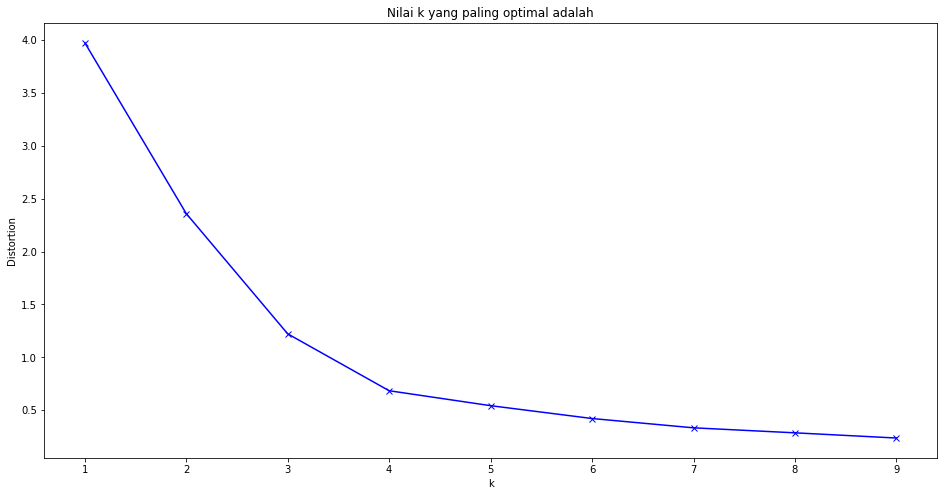

In [14]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Nilai k yang paling optimal adalah')
plt.show()

di dapatkan nilai k terbaik = 4

# Proses clusterisasi K-Means

In [15]:
from sklearn.cluster import KMeans

# iinisisalisasi dengan 3 centroid
kmeans = KMeans(n_clusters=4, random_state=42)
# fit the model
kmeans.fit(dfp)
# memsukan klaster ke variable
clusters = kmeans.labels_
kmeans.labels_

array([2, 1, 0, 0, 1, 1, 0, 1, 3, 1, 2, 3, 0, 1, 1, 1, 3, 3, 0, 2, 1, 3,
       3, 0, 1, 3, 3, 0, 3, 1, 1, 3, 1, 2, 0, 0, 0, 3, 0, 3, 1, 3, 0, 3,
       1, 2, 1, 3, 2, 1, 3, 2, 0, 2, 3, 3, 2, 2, 1, 1, 2, 0, 3, 1, 2])

# #Menampilkan hasil cluster

In [16]:
df_pca['cluster']=clusters
df_pca

,x0,x1,cluster
0,0.016073,-0.076808,2
1,-0.054130,-0.254427,1
2,0.140093,-0.204708,0
3,0.042328,-0.108632,0
4,0.574276,0.400161,1
...,...,...,...
60,-0.020000,-0.012201,2
61,0.145287,-0.313128,0
62,0.079714,0.158693,3
63,-0.279961,0.124019,1


Menampilkan isi klaster

In [17]:
X = vectorizer.fit_transform(dataPTA['Abstrak'])
def get_top_keywords(n_terms):
    df = pd.DataFrame(X.todense()).groupby(clusters).mean() # grup TF-IDF berdasarkan cluster
    terms = vectorizer.get_feature_names_out() # akses tf-idf
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([terms[t] for t in np.argsort(r)[-n_terms:]])) 
get_top_keywords(10)


Cluster 0
kompensasi,kompetensi,terhadap,kinerja,dan,yang,variabel,karyawan,prestasi,kerja

Cluster 1
produk,motor,terhadap,dan,konsumen,variabel,yang,pembelian,keputusan,merek

Cluster 2
sebesar,penelitian,equity,tahun,dan,yang,return,ratio,perusahaan,saham

Cluster 3
uji,terhadap,promosi,yang,harga,variabel,dan,pembelian,keputusan,produk


# # Visualisasi Cluster

In [18]:
# m# map clusters to appropriate labels 
cluster_map = {0: 0, 1: 1, 2: 2,3:3}
# apply mapping
df_pca['cluster'] = df_pca['cluster'].map(cluster_map)

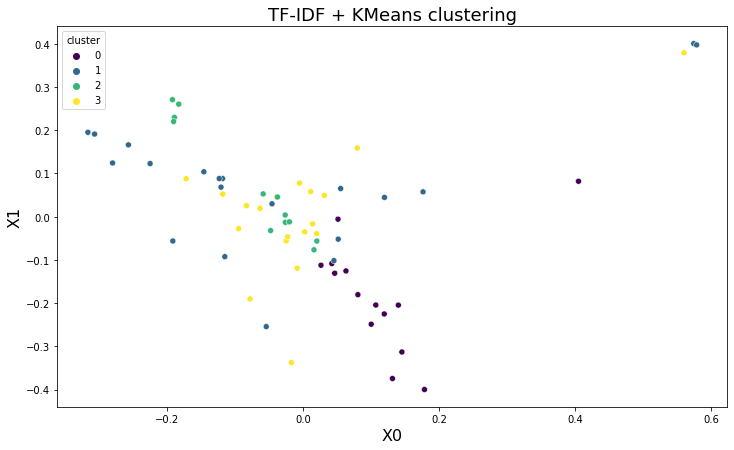

In [19]:
--